In [ ]:
# 구글 Colaboratory 를 사용하기 위해 구글 계정으로 로그인합니다. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 읽기를 위한 라이브러리
import numpy as np
np.random.seed(0)
import pandas as pd
import gc, os, time
import scipy as sp
import statsmodels.api as sm
from pandas import DataFrame, Series
from datetime import datetime, date, timedelta
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 탐색적 데이터 분석을 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox

# 모델링을 위한 라이브러리
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# 구글 드라이브 내 데이터가 위치한 경로를 설정합니다.
path = 'drive/MyDrive/Colab Notebooks/kaggle/input/'

# 학습용 데이터 
df_train = pd.read_csv(f'{path}train.csv')
df_test = pd.read_csv(f'{path}test.csv')

In [ ]:
## Data 유형분석

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

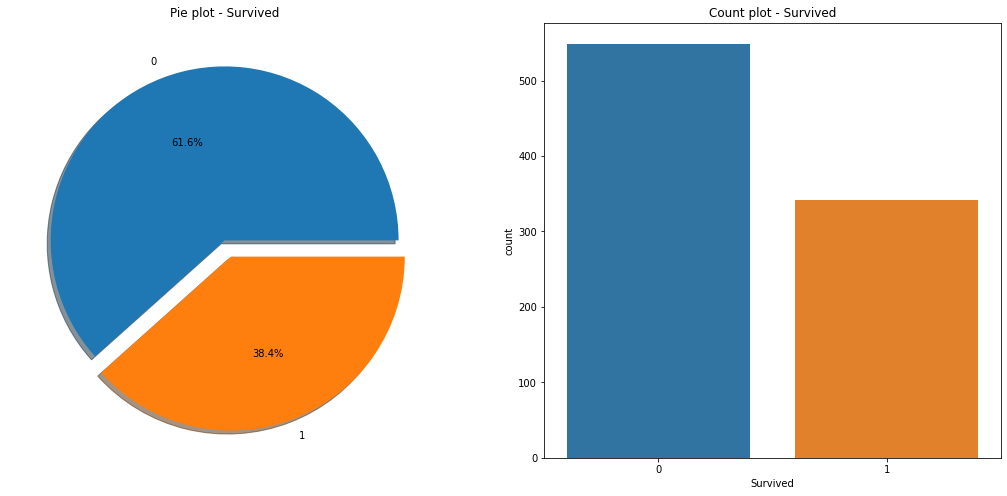

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

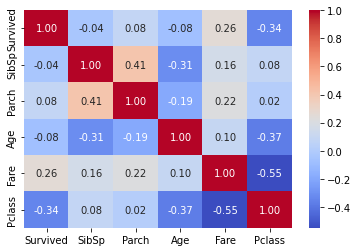

In [ ]:
g = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare","Pclass"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

##2.1 Pclass-Survived 상관율

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


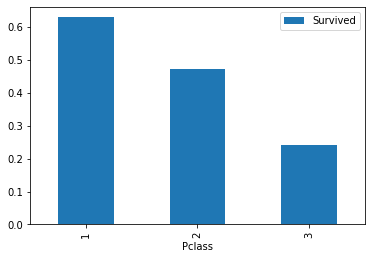

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

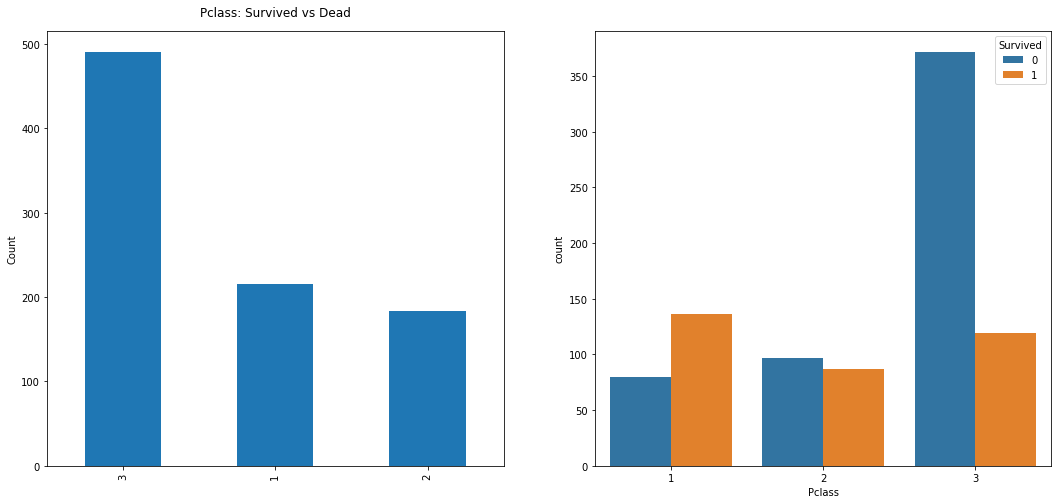

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[0].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

##2.2 Sex-Suvived 상관율

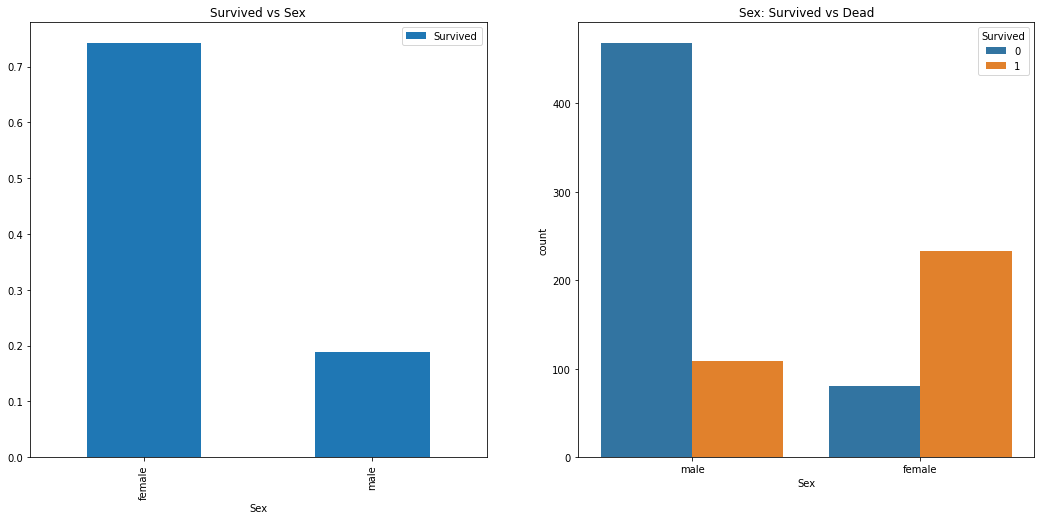

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


##2.3 Both Sex and Pclass

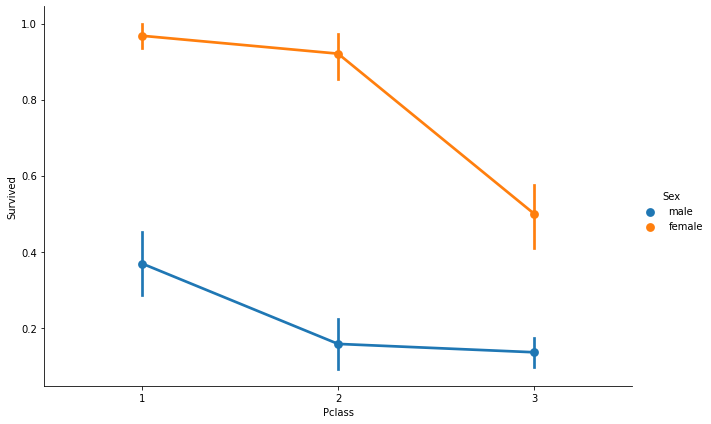

In [ ]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 여성이 Pclass전체에서 남성보다 생존율이 높음

##2.4 Age-Survived 상관율

In [ ]:
df_train.value_counts(['Age'])

Age  
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Length: 88, dtype: int64

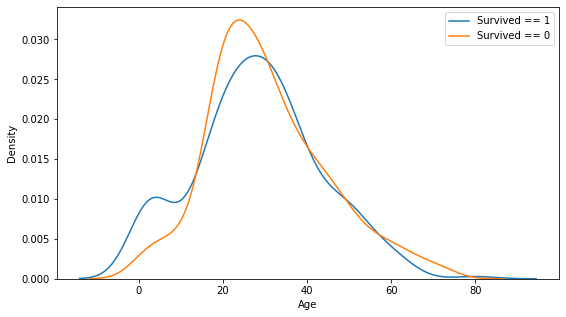

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

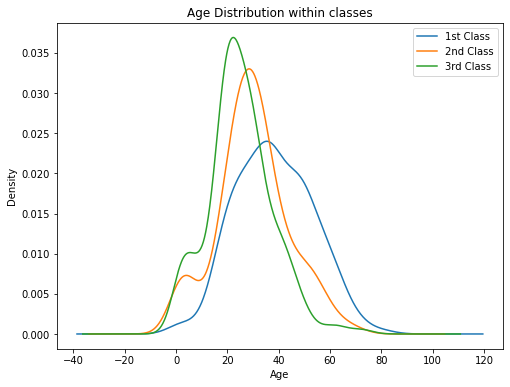

In [ ]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

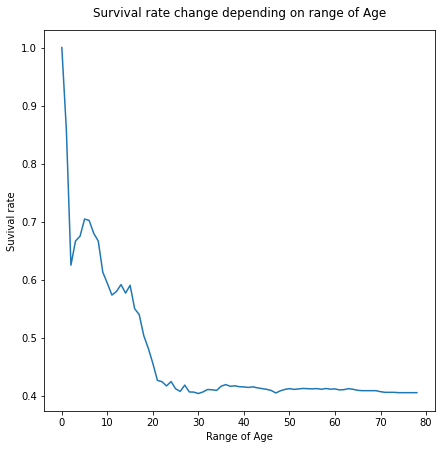

In [ ]:
cummulate_surviveal_ratio = []
for i in range(1, 80):
  cummulate_surviveal_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_surviveal_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Suvival rate')
plt.xlabel('Range of Age')
plt.show()

- 나이 범위별 생존율 변화를 통해 나이가 어릴 수록 생존률이 높은 것을 확인

##2.5 Pclass, Sex, Age

- Pclass, Sex, Age와의 상관율을 확인 -> violinplot 활용

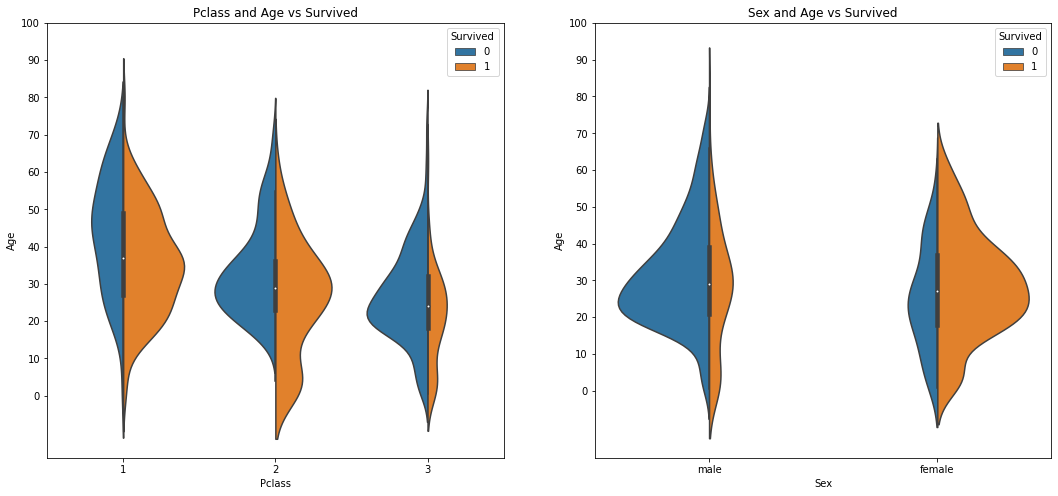

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

- 나이가 어릴수록, 여성이 생존율이 높은 것으로 보아 아이와 여성을 먼저 챙김

#2.6 Embarked-Survived 상관율

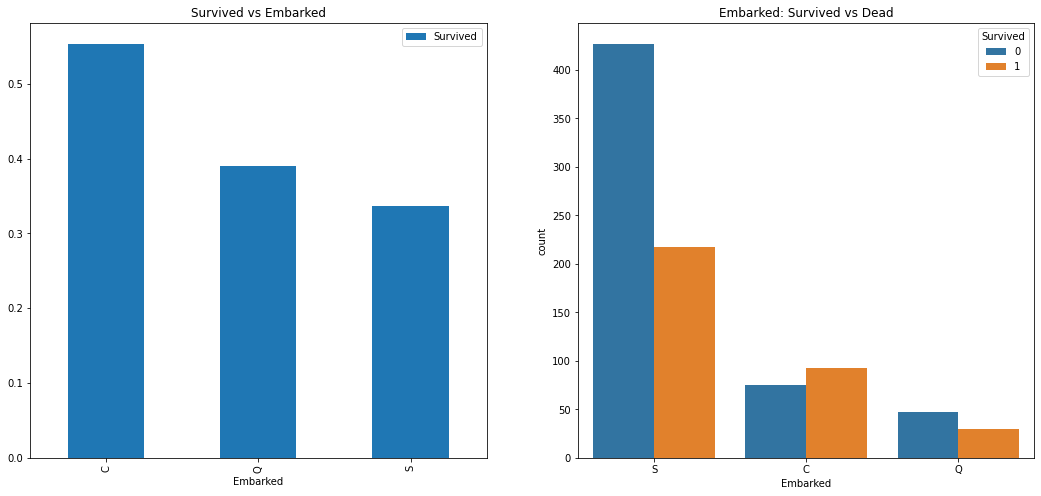

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Embarked: Survived vs Dead')
plt.show()

- 다른 feature와의 비교

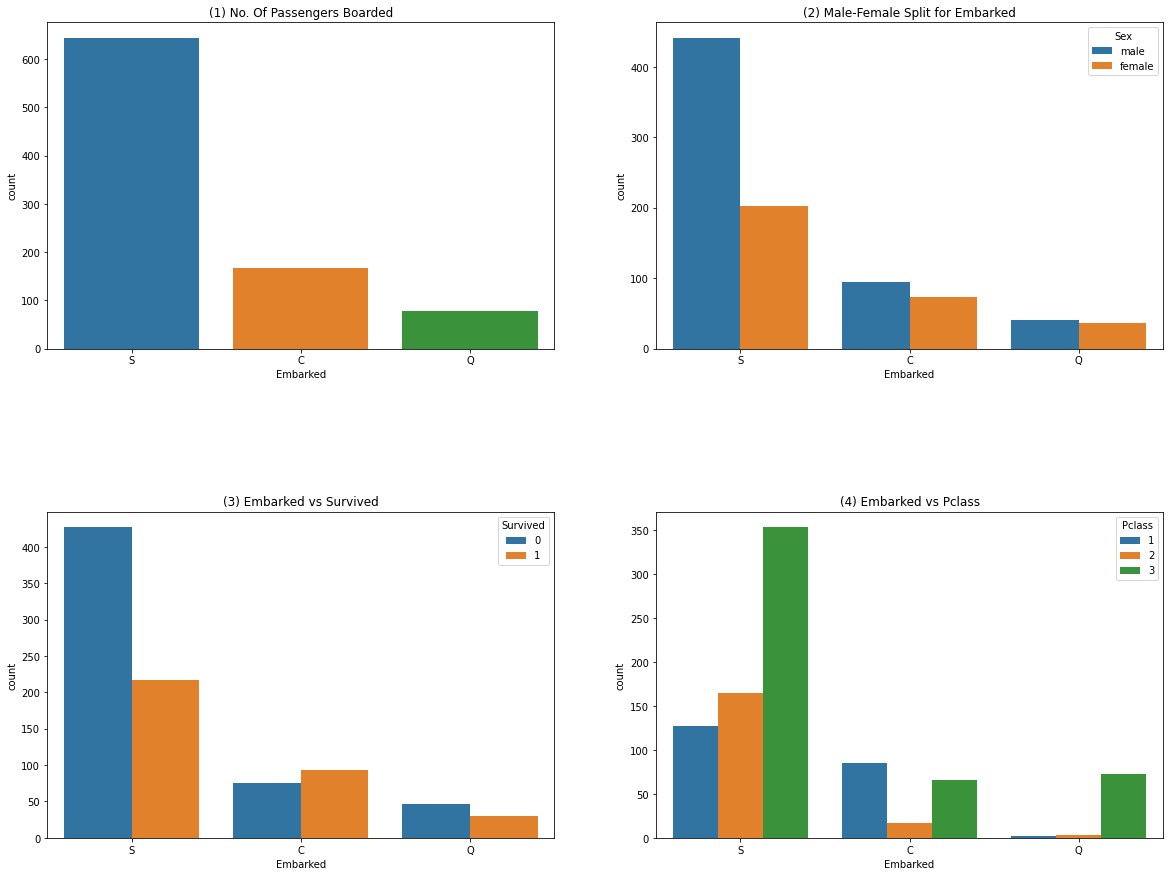

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) : S에서 가장 많은 사람이 탑승

- Figure(2) : S에선 남자가 많음, C,Q에선 남녀 성비 비슷

- Figure(3) : 생존확률이 S 경우 많이 낮음

- Figure(4) : S에선 3rd class가 많아 생존율이 낮으며, C에선 1st class 비율이 높아 생존율이 높음

In [ ]:
df_train['Embarked'].fillna('S',inplace=True)

#2.7 Family-SibSp(형제 자매)+Parch(부모,자녀)

- SibSp와 Parch를 합하면 Family이며, Family로 합쳐서 분석

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #자신 포함

In [ ]:
df_train.value_counts(['FamilySize'])

FamilySize
1             537
2             161
3             102
4              29
6              22
5              15
7              12
11              7
8               6
dtype: int64

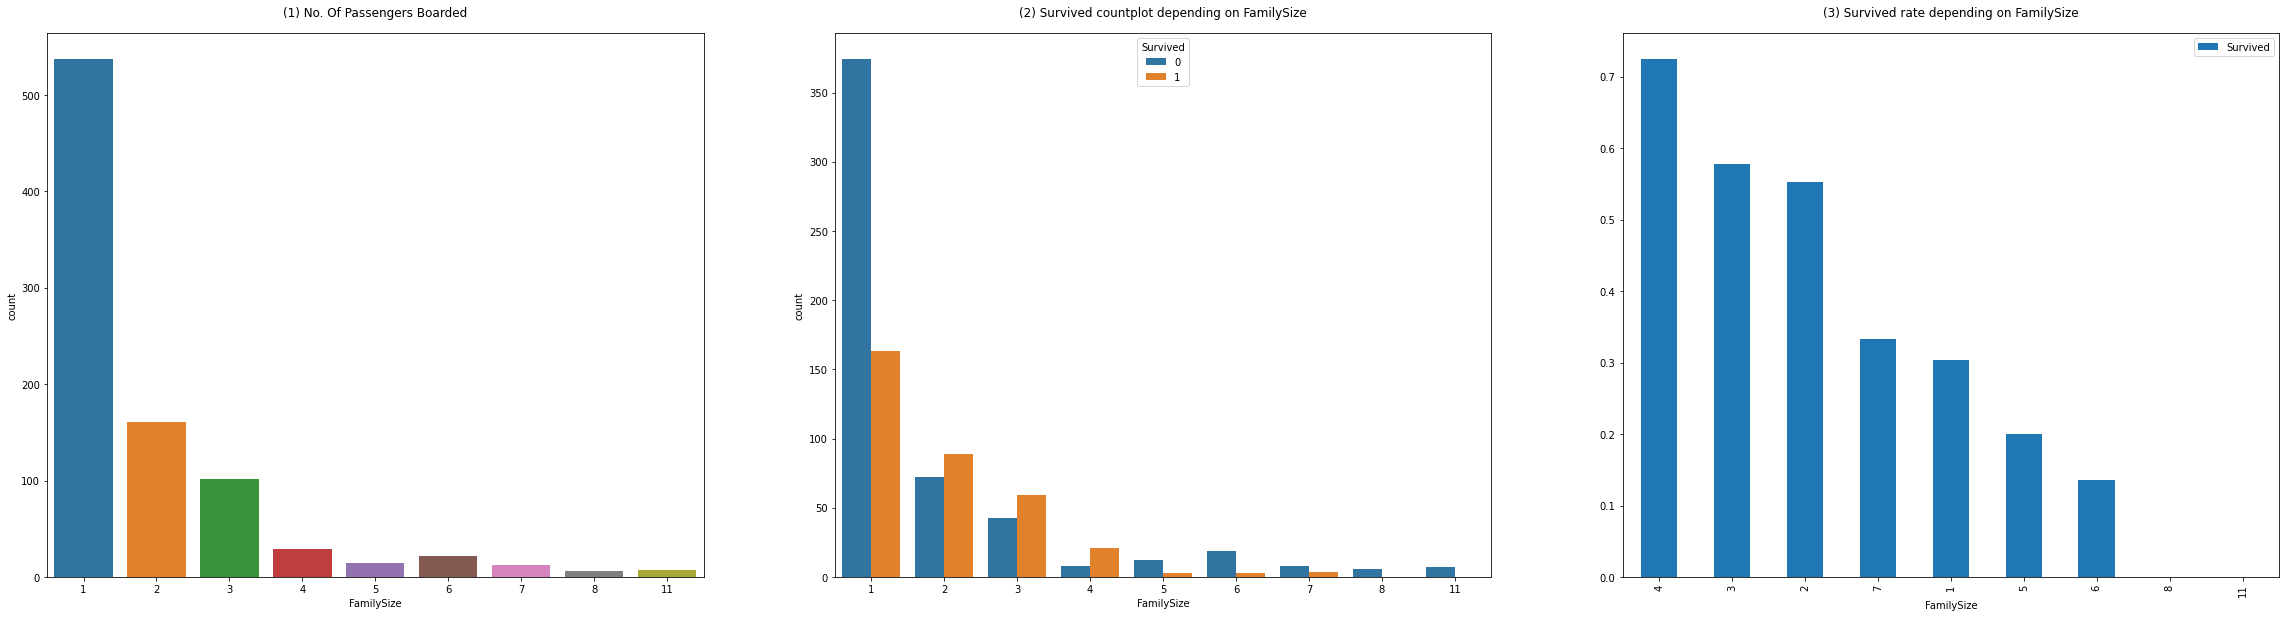

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (2), (3) - 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존확률이 높음. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아짐. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작으며, 3~4명 선에서 생존확률이 높은 걸 확인

#2.8 Fare

- Fare : 탑승요금으로 contious figur 값

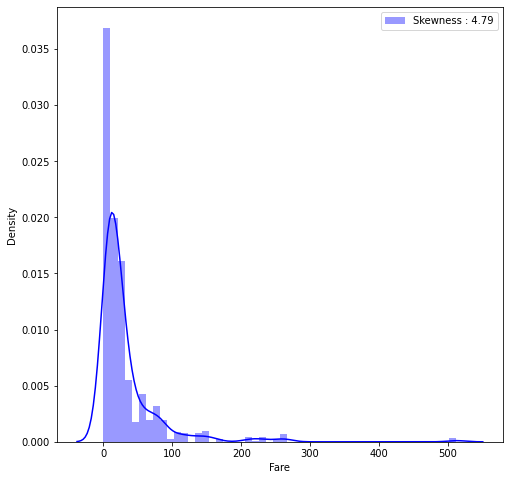

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.

- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

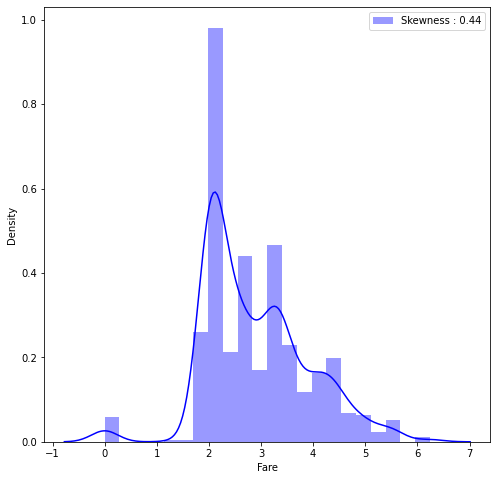

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#2.9 Cabin-Survived 상관율

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

- Cabin값은 결측치가 많아 사용하기 어려움. 포함하지않는다.

#2.10 Ticket-Survived 상관율

In [ ]:
Ticket = []
for i in list(df_train.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df_train["Ticket"] = Ticket
df_train["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [ ]:
df_train = pd.get_dummies(df_train, columns = ["Ticket"], prefix="T")

In [ ]:
df_train["Pclass"] = df_train["Pclass"].astype("category")
df_train = pd.get_dummies(df_train, columns = ["Pclass"],prefix="Pc")
df_train.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [ ]:
X_test.info()&X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   FamilySize  418 non-null    int64  
 7   T_A         418 non-null    uint8  
 8   T_A4        418 non-null    uint8  
 9   T_A5        418 non-null    uint8  
 10  T_AQ3       418 non-null    uint8  
 11  T_AQ4       418 non-null    uint8  
 12  T_C         418 non-null    uint8  
 13  T_CA        418 non-null    uint8  
 14  T_FC        418 non-null    uint8  
 15  T_FCC       418 non-null    uint8  
 16  T_LP        418 non-null    uint8  
 17  T_PC        418 non-null    uint8  
 18  T_PP        418 non-null    uint8  
 19  T_SC        418 non-null    u

TypeError: ignored

In [ ]:
df_test["Pclass"] = df_test["Pclass"].astype("category")
df_test = pd.get_dummies(df_test, columns = ["Pclass"],prefix="Pc")
df_test.drop(labels = ["PassengerId"], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
Ticket = []
for i in list(df_test.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df_test["Ticket"] = Ticket
df_test["Ticket"].head()
df_test = pd.get_dummies(df_test, columns = ["Ticket"], prefix="T")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,NaN,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,C123,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,NaN,...,0,0,0,0,0,0,0,0,0,1


#2.11 Name → initial 변환

In [ ]:
df_train['Initial']=0
df_test['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [ ]:
df_test.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      22.039846
Mr        32.114130
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

- Initial을 나이, 성별로 군집화 해본다. 작은수는 Other로 모음(Mr, Mrs, Miss, other)

In [ ]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Dona','Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

#2.12 Age 빈자리 채우기

- Initial 별로 나이평균으로 채워주기

In [ ]:
df_train.loc[(df_train.Age.isnull())&(df_train['Initial']=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train['Initial']=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train['Initial']=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train['Initial']=='Other'),'Age'] = 46
df_train.loc[(df_train.Age.isnull())&(df_train['Initial']=='Master'),'Age'] = 5

In [ ]:
df_test.loc[(df_test.Age.isnull())&(df_test['Initial']=='Mr'),'Age'] = 32
df_test.loc[(df_test.Age.isnull())&(df_test['Initial']=='Mrs'),'Age'] = 39
df_test.loc[(df_test.Age.isnull())&(df_test['Initial']=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test['Initial']=='Other'),'Age'] = 43
df_test.loc[(df_test.Age.isnull())&(df_test['Initial']=='Master'),'Age'] = 7

#2.11 문자열 Data 숫자형 변환

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    float64
 7   FamilySize  891 non-null    int64  
 8   T_A4        891 non-null    uint8  
 9   T_A5        891 non-null    uint8  
 10  T_AS        891 non-null    uint8  
 11  T_C         891 non-null    uint8  
 12  T_CA        891 non-null    uint8  
 13  T_CASOTON   891 non-null    uint8  
 14  T_FC        891 non-null    uint8  
 15  T_FCC       891 non-null    uint8  
 16  T_Fa        891 non-null    uint8  
 17  T_LINE      891 non-null    uint8  
 18  T_PC        891 non-null    uint8  
 19  T_PP        891 non-null    u

In [ ]:
df_train = df_train.drop(['Name','Cabin'],axis=1)
df_test = df_test.drop(['Name','Cabin'],axis=1)

In [ ]:
df_train['Sex'].replace(['male','female'],[0,1], inplace=True)
df_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
df_test['Sex'].replace(['male','female'],[0,1], inplace=True)
df_test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#3. MODELING

In [ ]:
df_train["Survived"] = df_train["Survived"].astype(int)

Y_train = df_train['Survived']
X_train = df_train.drop(labels=['Survived'], axis=1)
X_test = df_test

In [ ]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,T_A4,T_A5,T_AS,...,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3,Initial
0,0,22.0,1,0,1.981001,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,4.266662,1.0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,26.0,0,0,2.070022,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,2
3,1,35.0,1,0,3.972177,0.0,2,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,35.0,0,0,2.085672,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


##3.1 Simple Modeling 성능비교

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceprton (neural network)
- KNN
- Logistic regression
- Linear Discriminant Analysis

In [ ]:
kfold = StratifiedKFold(n_splits=10)

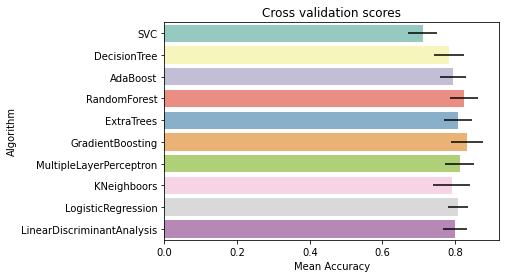

In [ ]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [ ]:
gsadaDTC.best_score_

0.8069912609238452

In [ ]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8249438202247191

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8294631710362047

In [ ]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.836167290886392

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8305243445692885

#3.2 Plot Learning curves

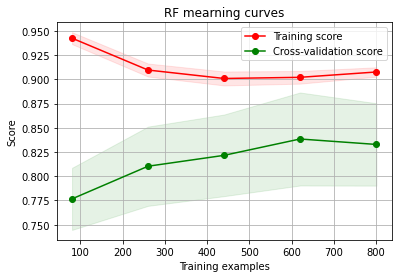

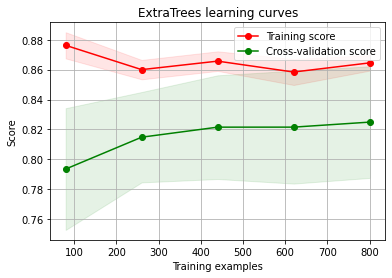

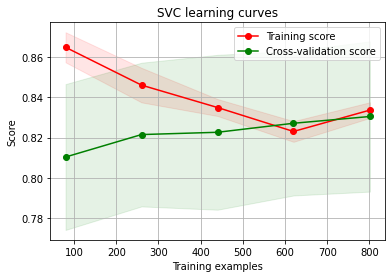

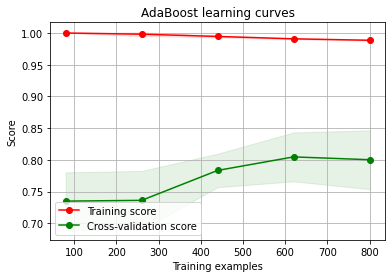

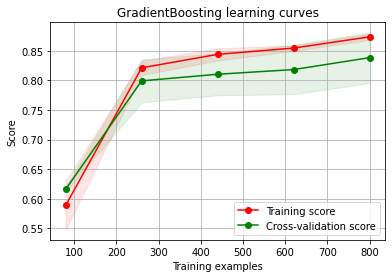

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

#3.3  Feature importance of tree based classifiers

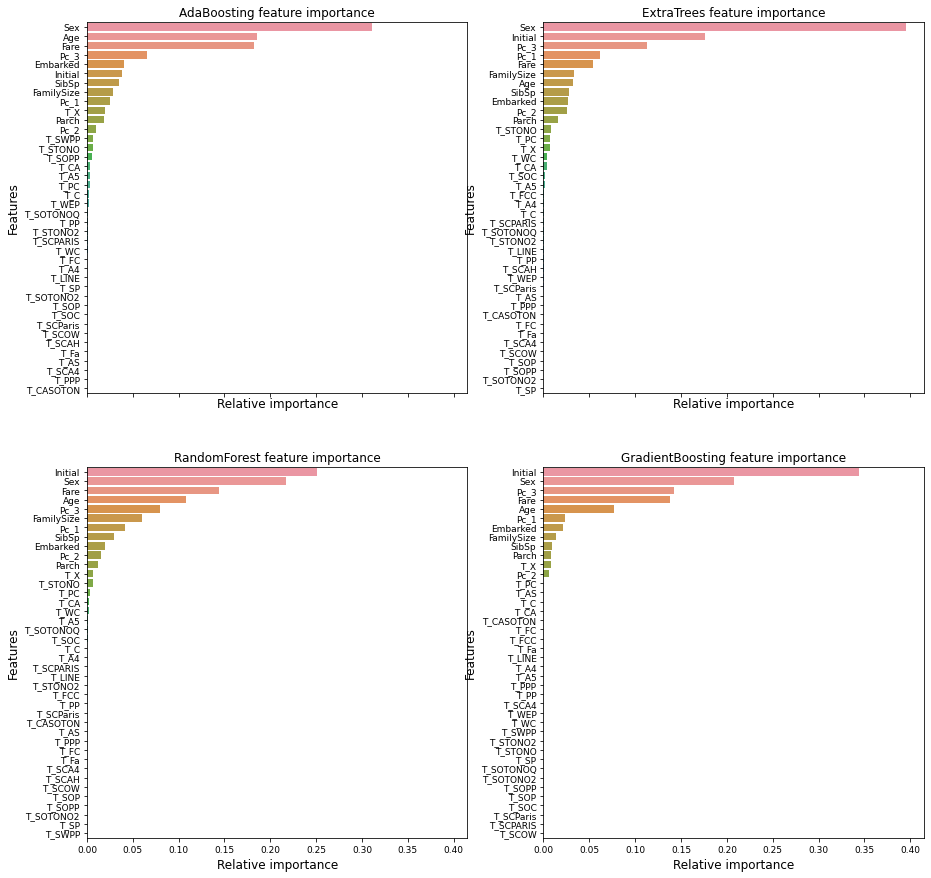

In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

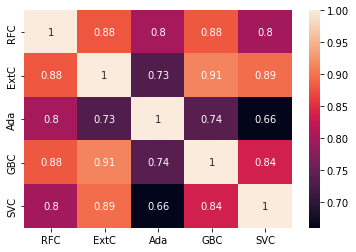

In [ ]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_train), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_train), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_train), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(X_train), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_train), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

#3.4 Ensemble modeling

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

#3.5 Prediction

In [ ]:
test_Survived = pd.Series(votingC.predict(X_train), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)

NameError: ignored